# **Legal Tech**
### *Einführung in Python II: Datenanalyse*
##### Yoan Hermstrüwer
##### Herbstsemester 2023

**Themen**: ```pandas```, ```numpy```, ```matplotlib```

## 1. Einführung: Python Library
Eine Library ist eine Sammlung von Funktionen, die man zu einem beliebigen Zweck benutzen kann. Als Vorbereitung auf die hands-on ML-Einheiten werden wir uns auf drei wichtige Libraries konzentrieren: ```pandas```, ```numpy``` und ```matplotlib```.

Diese Libraries werden häufig in dem Maschinellen Lernen (ML) und der Data Science (DS) verwendet. Sie ermöglichen u.a. das Erstellen, Verarbeiten, Analysieren und Darstellen von Daten.


### 1.1 Installation
Führe die unten stehende Zelle aus, um diese Libraries auf deinem Rechner zu installieren.

In [3]:
!pip install datasets # Online zugreifbare Datensätze herunterladen
!pip install matplotlib # Daten darstellen
!pip install numpy # Berechnungen an Daten
!pip install pandas # Daten(-sätze) erstellen, anpassen, manipulieren

### 1.2 ```import``` Statement (DE: Anweisung)
Um eine Library zu verwenden, muss man sie in ein Skript *importieren*. Dafür werden ```import``` **Statements** benutzt. Üblicherweise befinden sie sich oben auf einem Skript bzw. in den ersten Zellen eines Notebooks.

Beim Importieren kann der Library-Namen abgekürzt werden, dadurch, dass das Statement als ```import [Library] as [Abkürzung]``` geschrieben wird. Diese Abkürzung kann man zwar beliebig definieren, aber die meisten Libraries sind bereits mit einer Abkürzung assoziiert (z.B., ```numpy``` $→$ ```np```).

Falls man nur ein paar Funktionen benutzen möchte, muss nicht die ganze Library importiert werden. In diesem Fall benutzt man die Syntax ```from [Library] import [beliebige Funktion 1, 2, ...]```.

Führe die folgende Zelle aus, um die installierten Libraries zu importieren.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset

### 1.3 Datensatz
Für diese Einführung werden wir den Datensatz **SwissJudgmentPrediction** nutzen. Führe die untenstehende Zelle aus, um ihn zu laden.

Mehr über diesen Datensatz kannst du hier erfahren:
* [Dataset - available on Hugging Face](https://huggingface.co/datasets/rcds/swiss_judgment_prediction/blob/main/README.md)
* [Paper - Swiss-Judgment-Prediction: A Multilingual Legal Judgment Prediction Benchmark](https://arxiv.org/abs/2110.00806)

In [5]:
dataset = load_dataset('rcds/swiss_judgment_prediction', 'de') # Argumente: Datensatz-ID, Sprache


Generating train split:   0%|          | 0/35458 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4705 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9725 [00:00<?, ? examples/s]

Da der Datensatz sehr gross ist, werden wir nur eine Untermenge davon verwenden.

In [6]:
bger = dataset['train']

Jeder Datenpunkt ist folgendermassen strukturiert:

In [7]:
print(bger[0])

{'id': 2, 'year': 2000, 'text': 'A.- Der 1955 geborene V._ war seit 1. September 1986 hauptberuflich als technischer Kaufmann bei der Firma A._ AG tätig und im Rahmen einer Nebenbeschäftigung (Nachtarbeit) ab Mai 1990 bei einem Bewachungsdienst angestellt gewesen, als er am 10. Februar 1991 in Norwegen beim Hundeschlittenfahren eine Muskelruptur im Bereich des linken Oberschenkels erlitt. Die Verletzung wurde am 26. Februar 1991 mittels Muskelnaht operativ versorgt (Bericht des Dr. med. B._, Oberarzt, Chirurgische Klinik X._ vom 28. Februar 1991). Beweglichkeits- und Sensibilitätsausfälle führten zum Beizug des Dr. med. W._, Spezialarzt FMH Neurologie, welcher eine Ischiadicusparese links, wahrscheinlich traumatisch bedingt, diagnostizierte (Bericht vom 5. März 1991). Dr. med. S._, Spezialarzt für Chirurgie FMH, Chefarzt Spital X._ (Bericht vom 28. Oktober 1992) bestätigte, dass es bei der Operation vom 10. Februar 1991 zu einer Druckschädigung des Ischiasnerv gekommen sei. Bei Versorg

Jeder Eintrag hat neun **Keys**:
* ```id``` (int): ID des Dokuments
* ```year``` (int): Publikationsjahr
* ```text``` (str): Sachverhalt
* ```label``` (int): Ergebnis (0 = Abweisung, 1 = Zulassung)
* ```language``` (str): Sprache (```de```, ```fr```, ```it```)
* ```region``` (str): Region des Verwaltungsgerichts
* ```canton``` (str): Kanton des Verwaltungsgerichts
* ```legal area``` (str): Rechtsdomäne

Um auf einen Eintrag zuzugreifen, übergeben wir, wie in der Zeile oben, nur ein Argument, und zwar den Index des beliebigen Datenpunkts.

Um auf einen *Wert* zuzugreifen, müssen wir zwei Argumente übergeben: 1) den Index des beliebigen Datenpunkts und 2) den Key des beliebigen Werts. Dies charakterisiert die Python-Zuordnungstabelle (EN: *dictionary*).

In [8]:
print(bger[3934]['legal area'])

other


## 3. Erstellen von Datensätzen mit ```pandas```

Visualisierungstechnisch wäre es sinnvoller, wenn wir die Daten als eine Tabelle - mit gekennzeichneten Spalten und Zeilen - darstellen würden. Zu diesem Zweck verwenden wir die Library ```pandas```.

Es gibt bereits eine Methode, ```.from_dict()```, die die Daten einer Dictionary aufnimmt und eine Tabelle ausgibt. Führe die untenstehende Zelle aus, um die Tabelle zu kreiieren.

Mehr über diese Methode kannst du hier erfahren: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html

In [9]:
df = pd.DataFrame.from_dict(bger)

In [10]:
df.head(5) # die ersten 5 Einträge anzeigen

,id,year,text,label,language,region,canton,legal area,source_language
0,2,2000,A.- Der 1955 geborene V._ war seit 1. Septembe...,0,de,Zürich,zh,insurance law,n/a
1,3,2000,"Ansprüche nach OHG, hat sich ergeben: A.- X._ ...",1,de,Central Switzerland,lu,public law,n/a
2,4,2000,Art. 4 aBV (Strafverfahren wegen falschen Zeug...,0,de,Northwestern Switzerland,ag,public law,n/a
3,5,2000,"Art. 5 Ziff. 1 EMRK (Haftentlassung), hat sich...",1,de,n/a,n/a,public law,n/a
4,6,2000,"Mietvertrag, hat sich ergeben: A.- Die CT Cond...",0,de,n/a,n/a,civil law,n/a


Um auf eine ***Zeile*** (d.h. auf einen Datenpunkt) oder auf einen Wert durch seinen Zeilenindex zuzugreifen, benutzt man die Methode ```.iloc()```. Als Argument wird der Index (oder die Indizes in einer Reihe) übergeben.

Diese Untermenge kann sogar als eine eigene Tabelle definiert werden, indem ihr eine Variable zugeordnet wird.

In [11]:
untermenge1 = df.iloc[2:6] # dritter bis sechster Datenpunkt (Python-Indexierung!)

In [12]:
untermenge1

,id,year,text,label,language,region,canton,legal area,source_language
2,4,2000,Art. 4 aBV (Strafverfahren wegen falschen Zeug...,0,de,Northwestern Switzerland,ag,public law,n/a
3,5,2000,"Art. 5 Ziff. 1 EMRK (Haftentlassung), hat sich...",1,de,n/a,n/a,public law,n/a
4,6,2000,"Mietvertrag, hat sich ergeben: A.- Die CT Cond...",0,de,n/a,n/a,civil law,n/a
5,8,2000,A.- Der 1940 geborene H._ liess sich Mitte 198...,1,de,n/a,n/a,insurance law,n/a


Um eine bestimmte ***Spalte*** auszuwählen, kann der Spaltenname in eckigen Klammern angegeben werden.

In [13]:
untermenge2 = df[['year', 'label']] # Bei mehreren Spalten müssen die Spaltennamen in einer Liste angegeben werden, ansonsten reicht der einzelne Spaltenname als String aus.

In [14]:
untermenge2.head(10)

,year,label
0,2000,0
1,2000,1
2,2000,0
3,2000,1
4,2000,0
5,2000,1
6,2000,0
7,2000,1
8,2000,0
9,2000,1


In [15]:
kantone = df['canton']

In [16]:
kantone

0         zh
1         lu
2         ag
3        n/a
4        n/a
        ... 
35453    n/a
35454     zh
35455     gr
35456     ch
35457     ag
Name: canton, Length: 35458, dtype: object

Es ist auch möglich, bestimmte Spalten *und* Reihen auszuwählen.

In [17]:
df.iloc[2:6]['year']

2    2000
3    2000
4    2000
5    2000
Name: year, dtype: int64

Hier kannst du dir noch mehr Methoden und Beispiele anschauen: https://pandas.pydata.org/docs/user_guide/index.html

## 4. Berechnungen an Daten mit ```numpy```

Die Library ```numpy``` enthält zahlreiche Methoden, mit denen wir mit Daten arbeiten können. In den hands-on ML-Einheiten werden wir uns nur mit einigen beschäftigen.

Das ```numpy```-Äquivalent von einer iterablen Sequenz (z.B. Liste, ```pandas.DataFrame```-Objekt) nennt sich **Array**. Um eine iterable Sequenz in ein ```numpy```-Array zu konvertieren, benutzt man die Funktion ```array()```.

In [18]:
years = np.array(df['year'])

In [19]:
years

array([2000, 2000, 2000, ..., 2014, 2014, 2014])

Deskriptive Statistiken geben einen Einblick in die Daten. ```numpy``` hat bereits Funktionen dazu.

In [20]:
num_docs = years.shape[0]
min = np.min(years) # Minimum
max = np.max(years) # Maximum
unique = np.unique(years) # Einmalige Werte
mean = np.mean(years) # Mittelwert
median = np.median(years) # Median
var = np.var(years) # Varianz
std = np.std(years) # Standardabweichung (= Quadratwurzel der Varianz)

In [21]:
print('Datenpunktanzahl:', num_docs)
print('Minimum:', min)
print('Maximum:', max)
print('Einmalige Werte:', unique)
print('Mittelwert:', mean)
print('Median:', median)
print('Varianz:', var)
print('Standardabweichung:', std)

Datenpunktanzahl: 35458
Minimum: 2000
Maximum: 2014
Einmalige Werte: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014]
Mittelwert: 2007.2243781375148
Median: 2007.0
Varianz: 17.276745657903216
Standardabweichung: 4.156530483215926


Hier kannst du dir noch mehr Funktionen und Beispiele anschauen: https://numpy.org/doc/stable/user/index.html#user

## 5. Darstellen von Daten mit ```matplotlib```

Wenn Daten vernünftig dargestellt werden, lassen sich wichtige Informationen dazu (z.B. deskriptive Statistiken, Trends) schneller erkennen und einfacher verstehen. Zum Zweck der Datenvisualisierung werden wir die Library ```matplotlib``` verwenden.

### 5.1 Balkendiagramm (EN: *bar graph*)

Die Häufigkeiten von Werten können als ein Balkendiagramm dargestellt werden.

In [22]:
kantone = kantone.drop(kantone[kantone == 'n/a'].index) # Leere bzw. nicht gekennzeichnete Einträge löschen
kantone_unique = np.unique(kantone, return_counts=True)
names, counts = kantone_unique[0], kantone_unique[1]

In [23]:
names

array(['ag', 'ai', 'ar', 'be', 'bl', 'bs', 'ch', 'fr', 'gl', 'gr', 'lu',
       'nw', 'ow', 'sg', 'sh', 'so', 'sz', 'tg', 'ti', 'ur', 'vd', 'vs',
       'zg', 'zh'], dtype=object)

In [24]:
counts # Häufigkeit jedes Wertes (Kanton)

array([3603,   79,   53, 3365, 1094,  957, 1011,  349,  261,  962, 2296,
        262,  143, 2344,  413, 1436,  941, 1538,    6,  181,    5,  331,
        955, 8785])

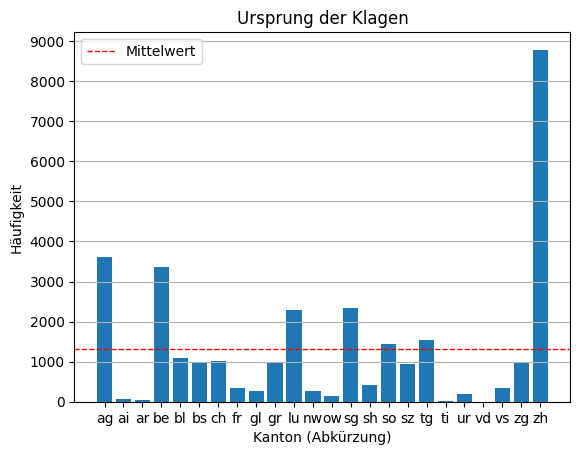

In [25]:
fig, ax = plt.subplots()

ax.bar(names, counts) # Diagramm erstellen

ax.axhline( # mittlerer Häufigkeitswert als Linie anzeigen
    y=np.mean(counts),
    color='red',
    linestyle='--',
    label='Mittelwert',
    linewidth=1
)

ax.set_title('Ursprung der Klagen') # Titel definieren
ax.set_ylabel('Häufigkeit') # y-Achse definieren
ax.set_xlabel('Kanton (Abkürzung)') # x-Achse definieren

ax.yaxis.set_ticks(np.arange(0, 9100, 1000)) # y-Schrittweite definieren
ax.grid(axis='y') # Gitterlinien anzeigen

plt.legend(loc=0)

plt.show();

### 5.3 Streudiagramm (EN: *scatter plot*)

Man verwendet Streudiagramme, um den Zusammenhang zwischen zwei Variablen darzustellen. Dabei können Korrelationen und Trends erkannt werden.

Wir können beispielsweise untersuchen, wie sich die Anzahl an abgewiesenen bzw. zugelassenen Klagen im Laufe der Zeit verändert haben.

In [26]:
entscheide0 = df[df['label'] == 0] # abgewiesene Klagen
entscheide1 = df[df['label'] == 1] # zugelassene Klagen

In [27]:
entscheide0_anzahl = entscheide0.groupby('year').size() # Anzahl an Abgewiesenen (label 0) pro Jahr
entscheide1_anzahl = entscheide1.groupby('year').size() # Anzahl an Zugelassenen (label 1) pro Jahr

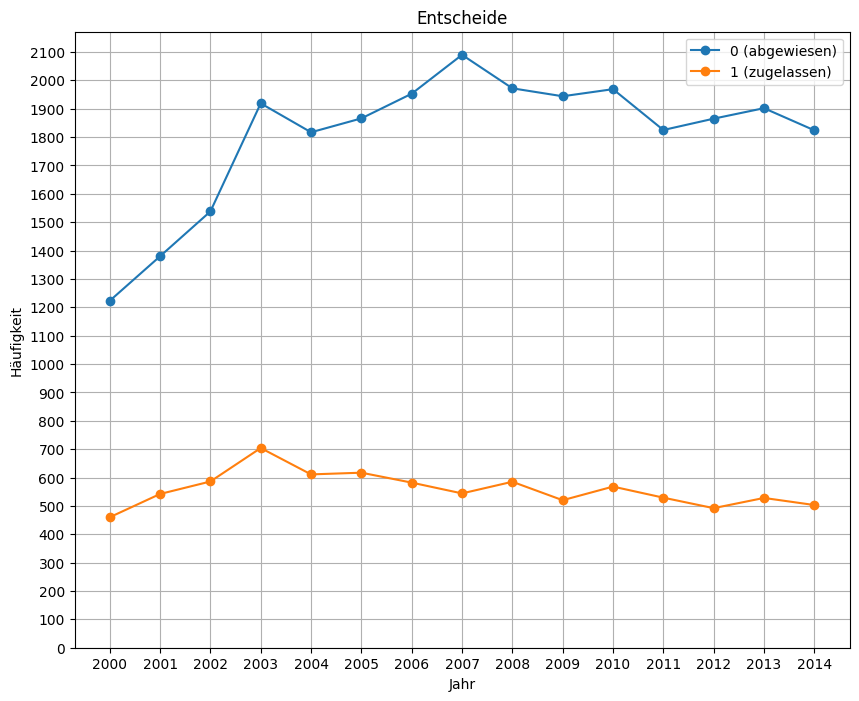

In [28]:
plt.figure(figsize=(10, 8)) # Grösse definieren

plt.plot(entscheide0_anzahl, marker='o', label='0 (abgewiesen)') # Linie darstellen
plt.plot(entscheide1_anzahl, marker='o', label='1 (zugelassen)') # Line darstellen

plt.title('Entscheide') # Titel definieren
plt.ylabel('Häufigkeit') # y-Achse definieren
plt.xlabel('Jahr') # x-Achse definieren

plt.xticks(np.arange(2000, 2015, 1)) # x-Schrittweise definieren
plt.yticks(np.arange(0, 2200, 100)) # y-Schrittweise definieren
plt.grid() # Gitterlinien anzeigen

plt.legend(loc='upper right') # Legende anzeigen
plt.show();

Hier kannst du dir noch mehr Funktionen und Beispiele anschauen: https://matplotlib.org/stable/plot_types/index.html